## Task 1: Load the Weather Dataset provided to you as ``weather.zip” file into the Jupyter Notebook.

In [1]:
import sys
import os
import zipfile
import collections

In [2]:
zipfile.ZipFile('weather.zip').extractall('.')

In [3]:
ls weather

RSM00030710.dly*  USW00022536.dly*  project2.ipynb*  stations.txt*
USW00014922.dly*  USW00023188.dly*  readme.txt*      weather.README*


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [5]:
%matplotlib inline

In [6]:
# Getting files
parent = 'weather'
minneapolis_path = os.path.join(parent,'USW00014922.dly')

In [7]:
def parsefile(filename):
    return np.genfromtxt(filename, 
                         delimiter = dly_delimiter,
                         usecols   = dly_usecols,
                         dtype     = dly_dtype,
                         names     = dly_names)

In [8]:
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

In [9]:
minneapolis = parsefile(minneapolis_path)
# minneapolis

In [10]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate + np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [11]:
def getobs(filename,obs):
    data = np.concatenate([unroll(row) for row in parsefile(filename) if row[2] == obs])
    
    data['value'][data['value'] == -999.9] = np.nan
    
    return data

In [12]:
# Get the tmax of minneapolis
minneapolis_tmax = getobs(minneapolis_path, 'TMAX')
minneapolis_tmin = getobs(minneapolis_path, 'TMIN')

In [13]:
def selectyear(data,year):
    start = np.datetime64('{}'.format(year))
    end = start + np.timedelta64(1,'Y')
    
    return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [14]:
def fillnans(data):
    dates_float = data['date'].astype(np.float64)
    
    nan = np.isnan(data['value'])
    
    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])

In [15]:
def getmean(start, end, station_t):
    # Get the mean
    station_mean = np.array([])
    
    for y in range(start, end + 1):
        mean = np.mean(selectyear(station_t, y))
        station_mean = np.append(station_mean, mean)
        
    return station_mean

In [16]:
# Get the mean
fillnans(minneapolis_tmax)
fillnans(minneapolis_tmin)

minneapolis_mean = getmean(1940, 2014, minneapolis_tmax)
minneapolis_mean

array([11.8068306 , 13.82547945, 12.75561644, 11.87452055, 13.08169399,
       11.6430137 , 13.43260274, 12.54328767, 13.31857923, 13.54219178,
       10.8569863 , 10.44876712, 12.75846995, 13.64356164, 12.78493151,
       12.96191781, 12.62131148, 12.49863014, 13.10438356, 12.94986301,
       12.15218579, 12.48767123, 11.22136986, 12.85616438, 13.2715847 ,
       11.0890411 , 11.89205479, 11.47780822, 12.54699454, 12.27178082,
       12.07945205, 12.01835616, 10.24453552, 13.11643836, 12.26849315,
       12.26465753, 13.80546448, 12.65945205, 12.21123288, 11.47726027,
       12.84562842, 13.33589041, 12.05726027, 12.1709589 , 12.2204918 ,
       11.75835616, 12.51917808, 15.14986301, 13.79180328, 12.12493151,
       14.04356164, 12.83013699, 12.20355191, 11.29589041, 12.78767123,
       12.55753425, 11.11420765, 12.08328767, 14.54383562, 14.02438356,
       12.84644809, 13.54109589, 12.88109589, 12.93671233, 12.83415301,
       13.77972603, 14.43068493, 13.70465753, 12.04535519, 12.33

In [17]:
def plotmean(start, end, mean, label):
    dates = ([])   
    for i in range(start, end+1):
        dates = np.append(dates, i)

    plt.figure(figsize=(7,5))
    plt.plot(dates, mean, label=label)
    plt.legend()

    return dates

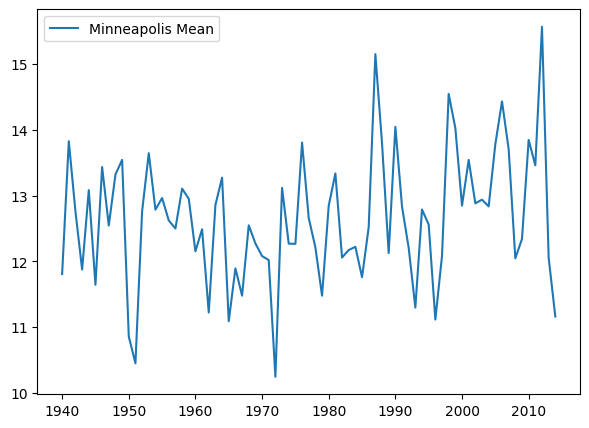

In [18]:
dates = plotmean(1940, 2014, minneapolis_mean, 'Minneapolis Mean')

In [19]:
# Find the year with the highest mean TMAX in Minneapolis
TMAX = np.argmax(minneapolis_mean)
tmax_year = int(dates[TMAX])
tmax_year

2012

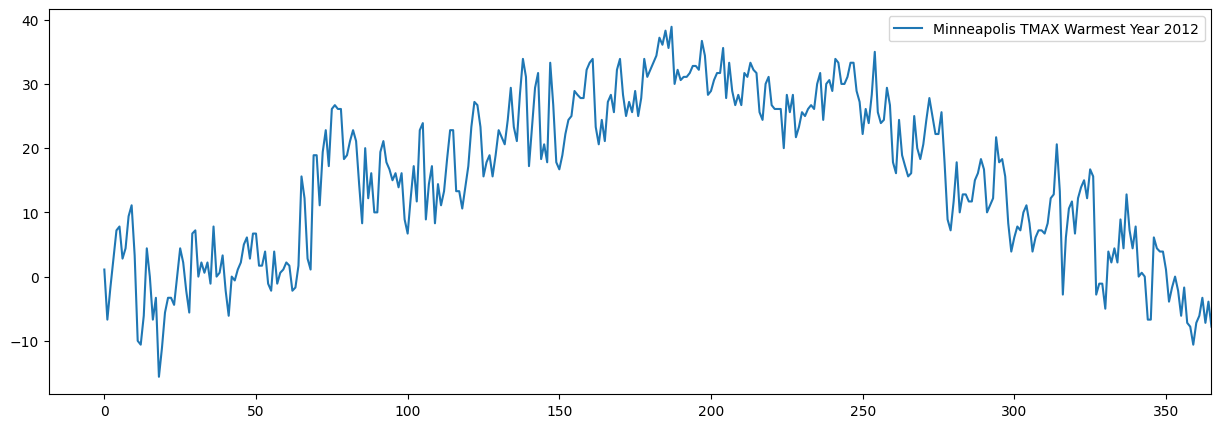

In [20]:
# Plot the temperature data for that highest mean TMAX year
minneapolis_highest = selectyear(minneapolis_tmax, tmax_year)
dates = np.arange(0, len(minneapolis_highest))

plt.figure(figsize=(15,5))
plt.plot(dates, minneapolis_highest, label='Minneapolis TMAX Warmest Year ' + f'{tmax_year}')
plt.axis(xmax=365)
plt.legend(loc='best')

## Task 3:
 - Find and plot the mean TMIN in San Diego, a warm place, for the year 1940 through 2014
 - Find the year with the lowest mean TMIN in San Diego
 - Plot the temperature data for that lowest mean TMIN year

In [21]:
# Getting files
parent = 'weather'
sandiego_path = os.path.join(parent,'USW00023188.dly')
sandiego_path

'weather/USW00023188.dly'

In [22]:
# Get the TMIN of San Diego
sandiego_tmin = getobs(sandiego_path, 'TMIN')
sandiego_tmax = getobs(sandiego_path, 'TMAX')

In [23]:
# Get the mean
fillnans(sandiego_tmin)
fillnans(sandiego_tmax)

# sandiego_mean = getmean(1940, 2014, sandiego_tmin) # This also works, but I wanted to try the example from the lecture
sandiego_tmin_all = np.vstack([selectyear(sandiego_tmin, year)[:365] for year in range(1940, 2014+1)])

In [24]:
sandiego_mean = np.mean(sandiego_tmin_all, axis=1)

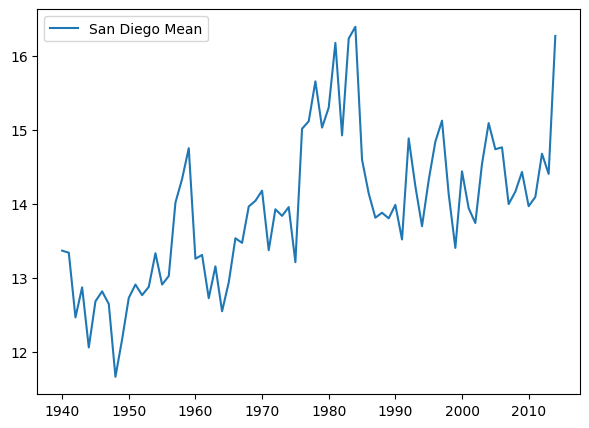

In [25]:
dates = plotmean(1940, 2014, sandiego_mean, 'San Diego Mean')

In [26]:
# Find the year with the lowest mean
TMIN = np.argmin(sandiego_mean)
tmin_year = int(dates[TMIN])
tmin_year

1948

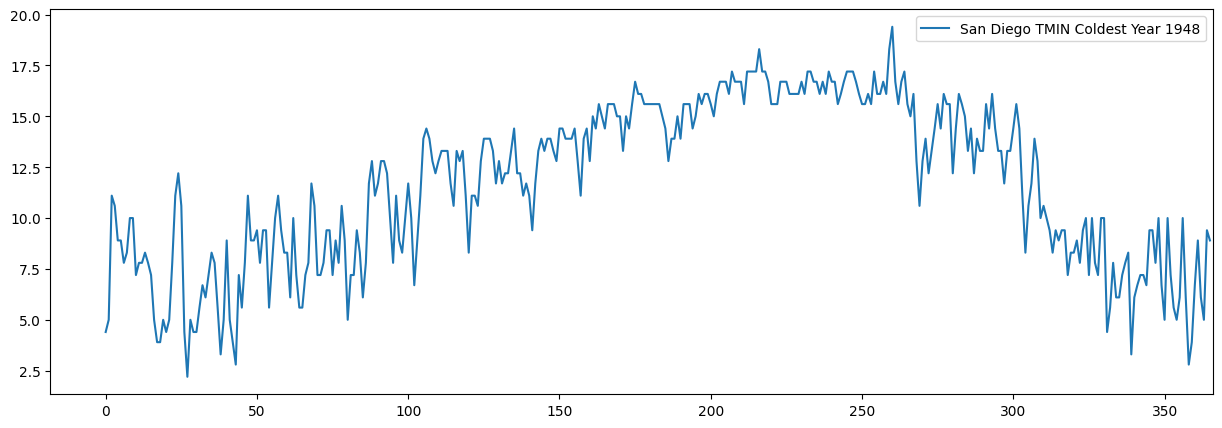

In [27]:
# Plot the temperature data for that lowest mean TMIN year
sandiego_lowest = selectyear(sandiego_tmin, tmin_year)
lowest_dates = np.arange(0, len(sandiego_lowest))

plt.figure(figsize=(15,5))
plt.plot(lowest_dates, sandiego_lowest, label='San Diego TMIN Coldest Year ' + f'{tmin_year}')
plt.axis(xmax=366)
plt.legend(loc='best')

## Task 4: In the same plot, show TMIN and TMAX series for those years and for those two cities i.e., warmest year for Minneapolis and coldest year for San Diego

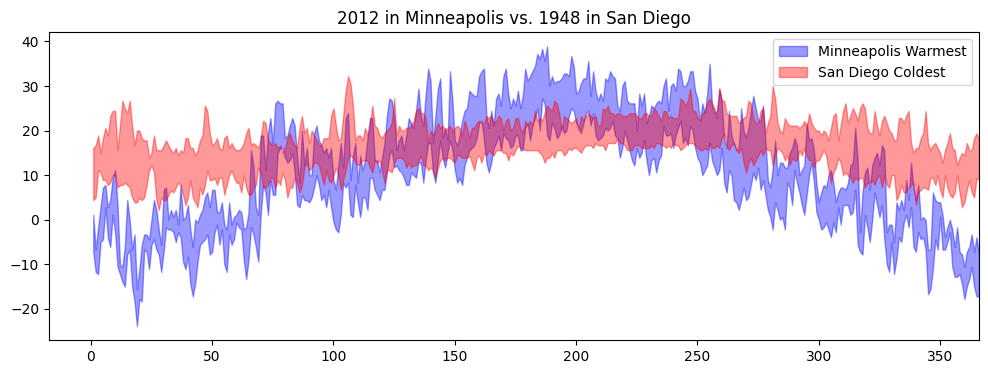

In [28]:
plt.figure(figsize=(12,4))

days = np.arange(1,366+1)

plt.fill_between(days, 
                 selectyear(minneapolis_tmin, tmax_year),      
                 selectyear(minneapolis_tmax, tmax_year),
                 color='b',alpha=0.4,label='Minneapolis Warmest')

plt.fill_between(days,
                 selectyear(sandiego_tmin, tmin_year),
                 selectyear(sandiego_tmax, tmin_year),
                 color='r',alpha=0.4,label='San Diego Coldest')

plt.axis(xmax=366)
plt.title(f'{tmax_year} in Minneapolis vs. {tmin_year} in San Diego')
plt.legend(loc='best')